***
***
> # Importing Libraries
***
***

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay


from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [55]:
# Setting the seed value to 0 ffor both
np.random.seed(0)
tf.random.set_seed(0)

***
***
> # Data Loading And PreProcessing
***
***

In [56]:
df = pd.read_csv(r"/content/sentiment.csv")

In [58]:

df = df[["Sentiment","Text"]]

<Axes: >

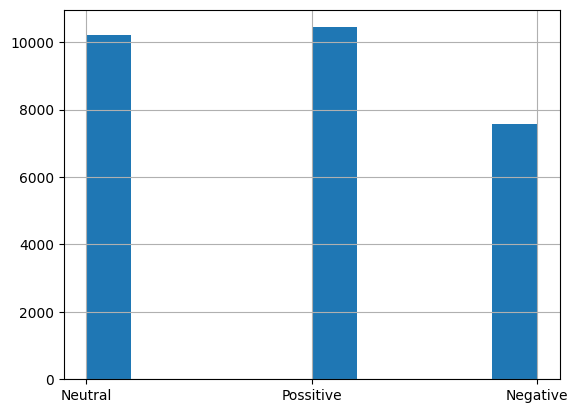

In [60]:
df["Sentiment"].hist()

In [61]:

df = df[df["Sentiment"]!="Neutral"]

<Axes: >

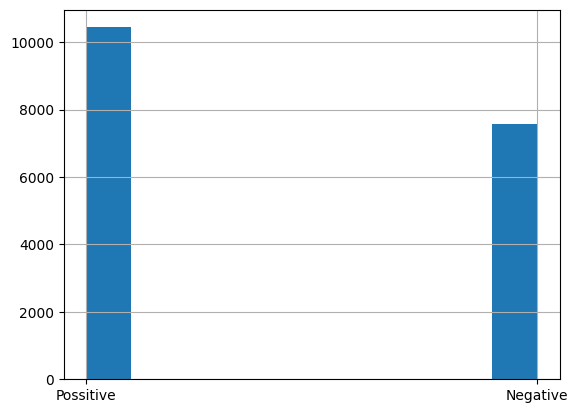

In [63]:
df["Sentiment"].hist()

In [64]:
def target(x):
  if x =="Possitive":
    return (1)
  elif x =="Negative":
    return (0)
  elif x =="Neutral":
    return ()
df["Sentiment"] = df["Sentiment"].apply(target)

In [65]:
x= df["Text"]
y = df["Sentiment"]

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42)

In [67]:
# trying model of deep learning
tfid = TfidfVectorizer(max_features=100)
x_train = tfid.fit_transform(x_train)
x_test = tfid.fit_transform(x_test)

In [68]:
X_train = x_train.toarray()
X_test = x_test.toarray()

In [69]:
D = X_train.shape[1]

***
***
> # Making Deep Learning Model
***
***

In [70]:
#making model
input = Input(shape=(D,))
x = Dense(1)(input)
model = Model(inputs=input,outputs=x)

In [71]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(
    loss = BinaryCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

In [73]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size = 128)

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5101 - loss: 0.6472 - val_accuracy: 0.4736 - val_loss: 0.7035
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7614 - loss: 0.5390 - val_accuracy: 0.4865 - val_loss: 0.7262
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7852 - loss: 0.4822 - val_accuracy: 0.4936 - val_loss: 0.7514
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7984 - loss: 0.4485 - val_accuracy: 0.4993 - val_loss: 0.7760
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8047 - loss: 0.4264 - val_accuracy: 0.5004 - val_loss: 0.7992
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8086 - loss: 0.4111 - val_accuracy: 0.5139 - val_loss: 0.8209
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8116 - loss: 0.3999 - val_accuracy: 0.5182 - val_loss: 0.8412
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8128 - loss: 0.3914 - val_accuracy: 0.5151 - v

***
***
># Model Evaluation
***
****

Text(0.5, 1.0, 'Loss Per Itration')

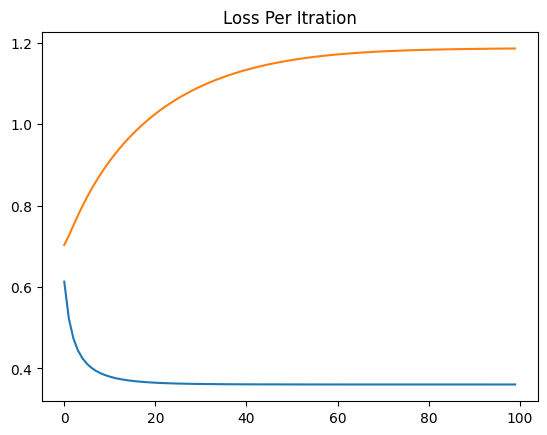

In [74]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.title("Loss Per Itration")

Text(0.5, 1.0, 'Accuracy Per Itration')

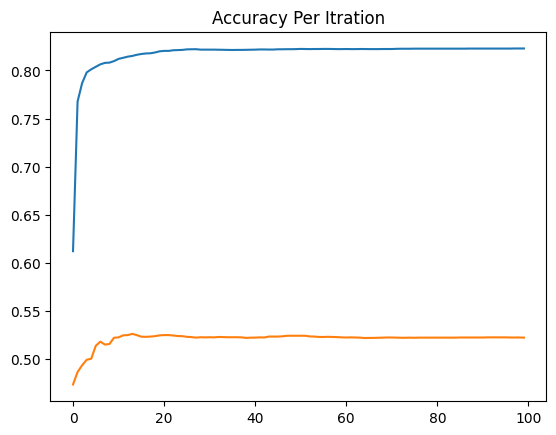

In [75]:
# Accuracy Per Itration
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.title("Accuracy Per Itration")

In [77]:
from matplotlib.cbook import flatten
pred_train = (model.predict(X_train) > 0.5).flatten()
pred_test = (model.predict(X_test) > 0.5).flatten()

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [87]:
cm1 = confusion_matrix(y_train,pred_train)

In [88]:
# for Training set
def plot_cm(cm1):
  import matplotlib.style as style
  style.use("classic")
  classes = ['Negative','Positive']
  disp = ConfusionMatrixDisplay(confusion_matrix = cm1,display_labels =classes)
  disp.plot()
  plt.show()

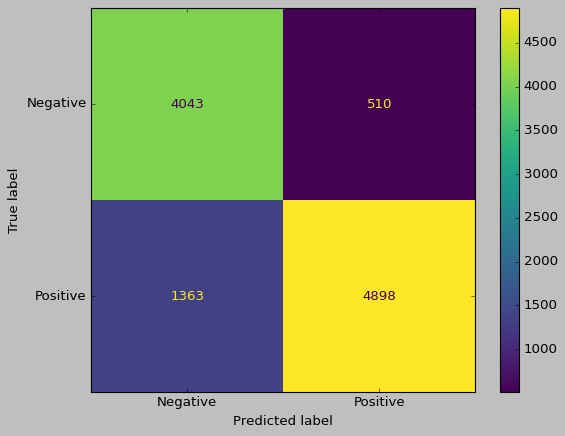

In [89]:
plot_cm(cm1)

In [90]:
#fro test set

cm2 = confusion_matrix(y_test,pred_test)

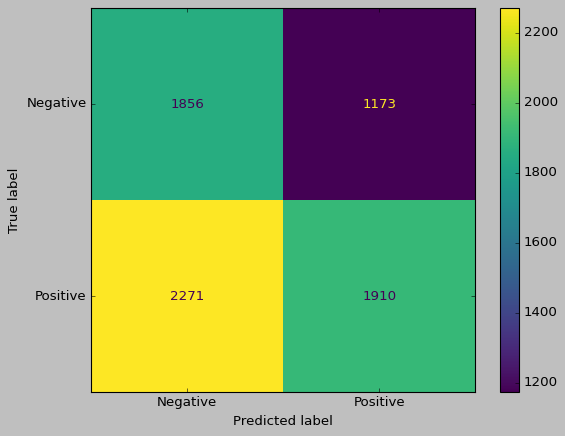

In [91]:
plot_cm(cm2)

In [92]:
pr_train = model.predict(X_train)
pr_test = model.predict(X_test)

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [95]:
print (f"The Accuracy Score of Training Set is {roc_auc_score(y_train,pred_train)}")
print (f"The Accuracy Score of Test Set is {roc_auc_score(y_test,pred_test)}")

The Accuracy Score of Training Set is 0.8351445448981459
The Accuracy Score of Test Set is 0.5347859948110623


In [96]:
print (f"The f1 Score of Training Set is {f1_score(y_train,pred_train)}")
print (f"The f1 Score of Test Set is {f1_score(y_test,pred_test)}")

The f1 Score of Training Set is 0.8394892450081413
The f1 Score of Test Set is 0.5258810572687225


In [97]:
model.layers

[<InputLayer name=input_layer_2, built=True>, <Dense name=dense_2, built=True>]

In [98]:
w = model.layers[1].get_weights()[0]